In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 100)

In [2]:
df = pd.read_excel('Online Retail.xlsx')
df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

It seems we have two columns with missing values, But we can't drop missing value rows because it is a big nimber and dropping them can effect a lot to data. So we impute missing values in Description based on other rows with same stock code. The customerID column has big number of issing values and it can not make a great impact on dataset so we'll drop that column.

In [6]:
stockcode_to_description = df.dropna(subset=['Description']).set_index('StockCode')['Description'].to_dict()

# Use the dictionary to fill missing Description values
df['Description'].fillna(df['StockCode'].map(stockcode_to_description), inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541797 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df = df.drop(columns=['CustomerID'])

In [9]:
df = df.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France


## Now The Main Goal
# Explonatory Data Analysis (EDA)

### Statistical Analysis

In [14]:
# Computing basic statistics for numerical clumns
df.describe()

,Quantity,UnitPrice
count,541797.000000,541797.000000
mean,9.555919,4.612067
std,218.103428,96.769831
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


Here, We came to know that we have some negative values in the dataset. Maybe these are for cancelled invoices. So, let's have a look at cancelled invoices.

In [ ]:
#get canceled transactions
cancelled_orders =df[df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()

Here we got it, cancelled invoices have negative values, but Is there any Positive number with cancelled invoices? Let's check it.

In [ ]:
# Cancelled orders having values greater than 0
cancelled_orders[cancelled_orders['Quantity']>0]

### Invoice Analysis

In [ ]:
# Number of Total Invoices
invoice_count = df['InvoiceNo'].nunique()
print(f'Total number of invoices: {invoice_count}')

# Number of cancelled invoices
c_invoices_count = df[df['InvoiceNo'].str.startswith('C', na=False)]['InvoiceNo'].nunique()
print(f'Total cancelled invoices: {c_invoices_count}')

As Invoices are more less than the total number of sales, that means most pf people buy more than one product. Also, cancelled Invoices are very small in number as compared to total invoices.

### Data Visualization

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'France'),
  Text(3, 0, 'EIRE'),
  Text(4, 0, 'Spain'),
  Text(5, 0, 'Netherlands'),
  Text(6, 0, 'Belgium'),
  Text(7, 0, 'Switzerland'),
  Text(8, 0, 'Portugal'),
  Text(9, 0, 'Australia')])

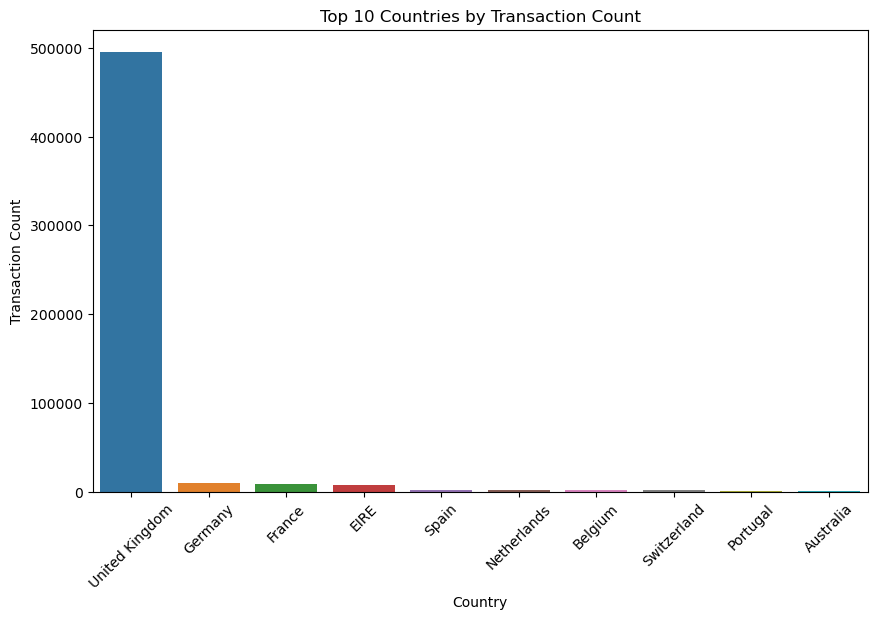

In [22]:
plt.figure(figsize=(10, 6))
country_counts = df['Country'].value_counts()[:10]  # Top 10 countries
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Top 10 Countries by Transaction Count')
plt.xlabel('Country')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)

In [34]:
# Let's calculate monthly revenue
df['Revenue'] = df['Quantity'] * df['UnitPrice']

[Text(0, 0, 'United Kingdom'),
 Text(1, 0, 'France'),
 Text(2, 0, 'Australia'),
 Text(3, 0, 'Netherlands'),
 Text(4, 0, 'Germany'),
 Text(5, 0, 'Norway'),
 Text(6, 0, 'EIRE'),
 Text(7, 0, 'Switzerland'),
 Text(8, 0, 'Spain'),
 Text(9, 0, 'Poland'),
 Text(10, 0, 'Portugal'),
 Text(11, 0, 'Italy'),
 Text(12, 0, 'Belgium'),
 Text(13, 0, 'Lithuania'),
 Text(14, 0, 'Japan'),
 Text(15, 0, 'Iceland'),
 Text(16, 0, 'Channel Islands'),
 Text(17, 0, 'Denmark'),
 Text(18, 0, 'Cyprus'),
 Text(19, 0, 'Sweden'),
 Text(20, 0, 'Austria'),
 Text(21, 0, 'Israel'),
 Text(22, 0, 'Finland'),
 Text(23, 0, 'Bahrain'),
 Text(24, 0, 'Greece'),
 Text(25, 0, 'Hong Kong'),
 Text(26, 0, 'Singapore'),
 Text(27, 0, 'Lebanon'),
 Text(28, 0, 'United Arab Emirates'),
 Text(29, 0, 'Saudi Arabia'),
 Text(30, 0, 'Czech Republic'),
 Text(31, 0, 'Canada'),
 Text(32, 0, 'Unspecified'),
 Text(33, 0, 'Brazil'),
 Text(34, 0, 'USA'),
 Text(35, 0, 'European Community'),
 Text(36, 0, 'Malta'),
 Text(37, 0, 'RSA')]

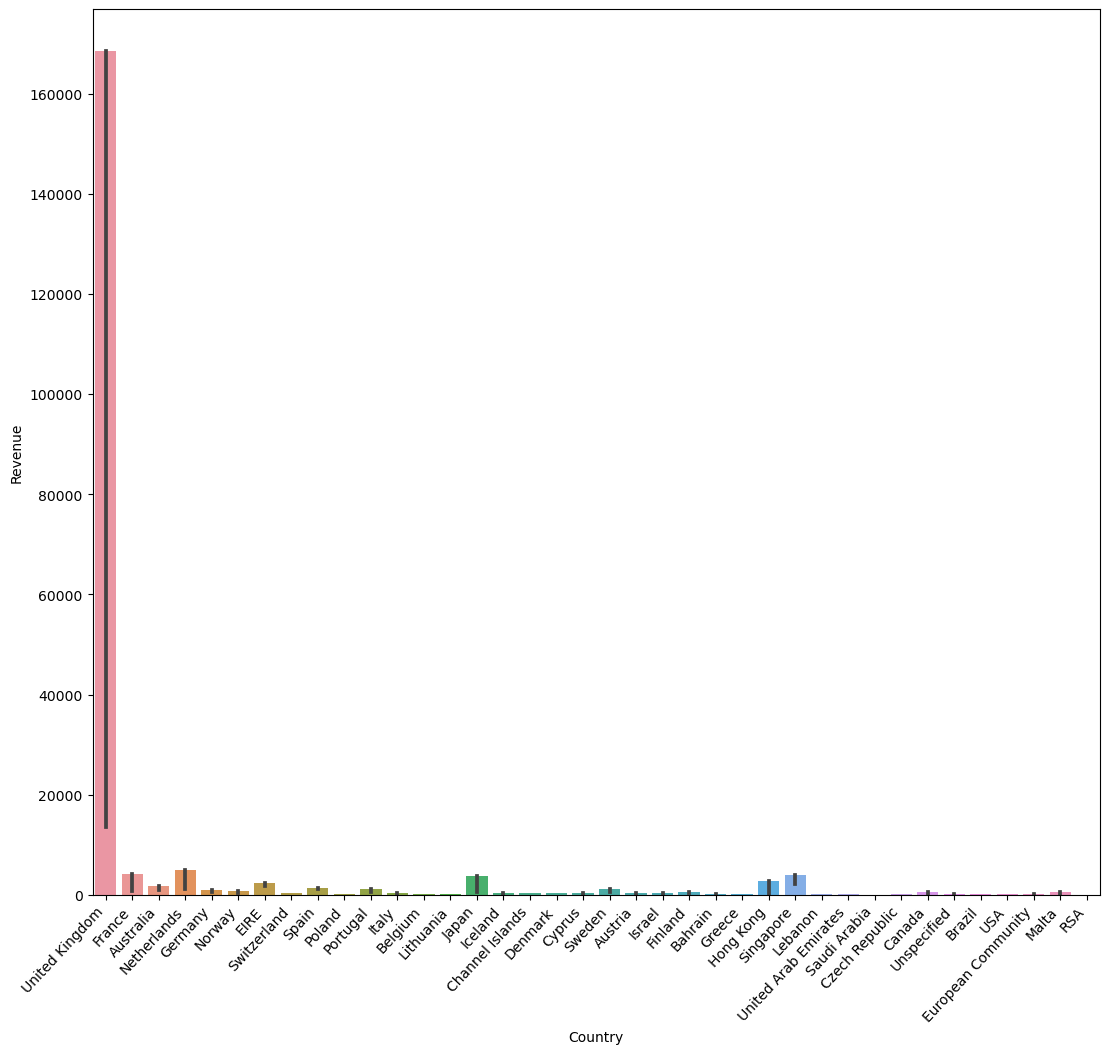

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='Revenue',data=df,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")

### Time Series Analysis

Text(0, 0.5, 'Revenue')

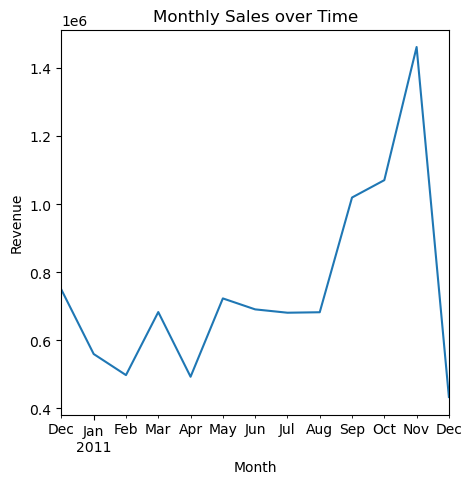

In [37]:
# Let's take a look at Monthly sales
monthly_slaes = df.resample('M', on='InvoiceDate')['Revenue'].sum()
plt.figure(figsize=(5, 5))
monthly_slaes.plot()
plt.title('Monthly Sales over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')

Trends of monthly sales is normal from January to August, But From August it starts being high & high and in November it reaches on it's peak. But after that suddenly it falls down in December.

## Summary
+ We have a small number of cancelled invoices that means most of the customers don't return the products.
+ As Invoices are more less than the total number of sales, that means most pf people buy more than one product.
+ The largest market in the world exist in United Kingdom followed by Germany and France.
+ In November sales are on the peak, but in December these are very low.